## Load MNIST on Python 3.x

In [57]:
import pickle
import gzip
eta = 0.003

In [7]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

## Load USPS on Python 3.x

In [8]:
from PIL import Image
import os
import numpy as np

In [9]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

#### one hot vector


In [58]:
training_data[1].shape[0]
onehotvector = np.zeros((50000,10))
for i in range(50000):
    if(training_data[1][i] ==0):
        onehotvector[i] = [1,0,0,0,0,0,0,0,0,0]
    if(training_data[1][i] ==1):
        onehotvector[i] = [0,1,0,0,0,0,0,0,0,0]
    if(training_data[1][i] ==2):
        onehotvector[i] = [0,0,1,0,0,0,0,0,0,0] 
    if(training_data[1][i] ==3):
        onehotvector[i] = [0,0,0,1,0,0,0,0,0,0]
    if(training_data[1][i] ==4):
        onehotvector[i] = [0,0,0,0,1,0,0,0,0,0]
    if(training_data[1][i] ==5):
        onehotvector[i] = [0,0,0,0,0,1,0,0,0,0]
    if(training_data[1][i] ==6):
        onehotvector[i] = [0,0,0,0,0,0,1,0,0,0]
    if(training_data[1][i] ==7):
        onehotvector[i] = [0,0,0,0,0,0,0,1,0,0]
        
    if(training_data[1][i] ==8):
        onehotvector[i] = [0,0,0,0,0,0,0,0,1,0]
    if(training_data[1][i] ==9):
        onehotvector[i] = [0,0,0,0,0,0,0,0,0,1]
    




onehotvector[49000]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [60]:
import numpy as np
def softmax(x):
    ex = np.exp(x)
    sum_ex = np.sum( np.exp(x))
    return ex/sum_ex

#### initialiazing of weights

In [61]:

wnew = np.random.rand(10,784)/10000


In [120]:

b = [1,1,1,1,1,1,1,1,1,1]


### Logistic Regression on mnist dataset

In [63]:

for i in range(50000):
    z = np.dot(wnew,training_data[0][i]) + b
    s = softmax(z)
    #k = values.index(max(s))
    delE = np.dot(np.transpose((s - onehotvector[i])[np.newaxis]),(training_data[0][i][np.newaxis]))
    wnew = wnew - eta*delE
    
  

#### Training accuracy

In [121]:
testdata = test_data[0]
#testonehotvector = np.zeros((10000,10))
right = 0
wrong = 0
for i in range(50000):
    z = np.dot(wnew,training_data[0][i]) 
    s = softmax(z)
    m = np.argmax(s)
    if (m == training_data[1][i]):
            right = right + 1
accuracy = (right/50000)*100

print(accuracy)
    



90.24


#### Validation accuracy

In [122]:
right = 0
for i in range(10000):
    z = np.dot(wnew,validation_data[0][i]) 
    s = softmax(z)
    m = np.argmax(s)
    if (m == validation_data[1][i]):
            right = right + 1
accuracy = (right/10000)*100

print(accuracy)

91.21000000000001


#### Testing accuracy

In [123]:
right = 0
predlog = []
for i in range(10000):
    z = np.dot(wnew,test_data[0][i]) 
    s = softmax(z)
    m = np.argmax(s)
    predlog.append(m)
    if (m == test_data[1][i]):
            right = right + 1
accuracy = (right/10000)*100

print(accuracy)


90.79


In [20]:
from sklearn.metrics import confusion_matrix
>>> y_true =test_data[1]  
>>> y_predict = predlog
>>> confusion_matrix(y_true, y_predict)

array([[ 955,    0,    1,    4,    0,    5,    9,    1,    5,    0],
       [   0, 1113,    0,    5,    0,    3,    4,    2,    8,    0],
       [   9,    9,  881,   31,   11,    3,   13,   24,   43,    8],
       [   2,    0,   11,  927,    0,   37,    1,   12,   12,    8],
       [   2,    4,    4,    1,  887,    1,   12,    4,   10,   57],
       [   8,    5,    1,   44,    6,  775,   10,    9,   26,    8],
       [  12,    3,    3,    3,    8,   29,  892,    3,    5,    0],
       [   2,   14,   19,    8,    5,    0,    0,  951,    3,   26],
       [   3,   10,    4,   46,    7,   55,   12,   16,  808,   13],
       [   8,    8,    2,   13,   20,   19,    0,   40,    4,  895]])

#### Testing accuracy on USPS dataset

In [124]:
right = 0
predlogU = []
for i in range(19999):
    z = np.dot(wnew,USPSMat[i]) 
    s = softmax(z)
    m = np.argmax(s)
    predlogU.append(m)
    if (m == USPSTar[i]):
            right = right + 1
accuracy = (right/19999)*100

print(accuracy)

35.24176208810441


In [22]:
from sklearn.metrics import confusion_matrix
>>> y_true =USPSTar  
>>> y_predict = predlogU
>>> confusion_matrix(y_true, y_predict)

array([[ 563,    4,  255,   84,  167,  238,   95,   88,  146,  360],
       [ 159,  356,  161,  341,  153,  108,   29,  464,  202,   27],
       [ 173,   21, 1101,  233,   37,  149,   87,   85,   81,   32],
       [  59,    2,  108, 1337,    3,  331,    3,   67,   56,   34],
       [  64,   81,   32,   75,  833,  169,   46,  210,  321,  169],
       [ 134,   19,  162,  210,   24, 1232,   82,   72,   48,   17],
       [ 262,   10,  334,  147,   65,  396,  677,   26,   41,   42],
       [ 161,  200,  216,  523,   58,  116,   22,  368,  276,   60],
       [ 222,   32,  116,  248,   76,  737,  102,   56,  343,   68],
       [  30,  144,  111,  526,   88,  112,   14,  460,  336,  179]])

In [220]:
store = wnew

#### mini batch size SGD

In [164]:
#Mini-Batch SGD Logistic Regression
wt = np.random.rand(10,784)/10000
batchsize = 50
epoch = 20
sum = 0
for j in range(epoch):
    for i in range(len(training_data[0])):
        z = np.dot(wt,training_data[0][i]) + b 
        y = softmax(z)
        E = np.dot(np.transpose((y-onehotvector[i])[np.newaxis]),training_data[0][i][np.newaxis])
        sum = sum + E
        if((i+1)%batchsize==0):
            wt = wt - eta*(sum/batchsize)
            sum = 0

In [165]:
y_pred_lr =[]
right = 0
wrong = 0
for i in range(len(test_data[0])):
    z = np.dot(wt,test_data[0][i])
    y = softmax(z)
    y_pred_lr.append(np.argmax(y))
    if(np.argmax(y)==test_data[1][i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 90.33


In [166]:
y_pred_lru =[]
right = 0
wrong = 0
for i in range(len(USPSMat)):
    z = np.dot(wt,USPSMat[i])
    y = softmax(z)
    y_pred_lru.append(np.argmax(y))
    if(np.argmax(y)==USPSTar[i]):
        right = right + 1
    else:
        wrong = wrong + 1
    
testacc = (right/(right+wrong))*100
print("Testing Accuracy : "+ str(testacc))

Testing Accuracy : 35.161758087904396


### Support Vector Machine

#### Support Vector Machine with default gamma

In [129]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata

classifier1 = SVC(kernel='rbf', gamma = 'auto')
classifier1.fit(training_data[0], training_data[1])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [130]:
y_pred = classifier1.predict(test_data[0])

In [137]:
right = 0
for i in range(10000):
    
    if (y_pred[i] == test_data[1][i]):
            right = right + 1
accuracy = right/10000

print(accuracy)

0.9435


In [138]:
from sklearn.metrics import confusion_matrix
>>> y_true = test_data[1] 
>>> y_predict = y_pred
>>> confusion_matrix(y_true, y_predict)

array([[ 967,    0,    1,    0,    0,    5,    4,    1,    2,    0],
       [   0, 1120,    2,    3,    0,    1,    3,    1,    5,    0],
       [   9,    1,  962,    7,   10,    1,   13,   11,   16,    2],
       [   1,    1,   14,  950,    1,   17,    1,   10,   11,    4],
       [   1,    1,    7,    0,  937,    0,    7,    2,    2,   25],
       [   7,    4,    5,   33,    7,  808,   11,    2,   10,    5],
       [  10,    3,    4,    1,    5,   10,  924,    0,    1,    0],
       [   2,   13,   22,    5,    7,    1,    0,  954,    4,   20],
       [   4,    6,    6,   14,    8,   24,   10,    8,  891,    3],
       [  10,    6,    0,   12,   33,    5,    1,   14,    6,  922]])

In [139]:
y_predUSVM1 = classifier1.predict(USPSMat)

In [140]:
right = 0
for i in range(19999):
    
    if (y_predUSVM1[i] == USPSTar[i]):
            right = right + 1
accuracy = right/19999

print(accuracy)

0.38541927096354817


In [141]:
from sklearn.metrics import confusion_matrix
>>> y_true = USPSTar 
>>> y_predict = y_predUSVM1
>>> confusion_matrix(y_true, y_predict)

array([[ 573,    2,  428,   19,  285,  248,   73,   44,    6,  322],
       [ 110,  429,  285,  137,  273,  180,   46,  501,   22,   17],
       [ 128,   18, 1402,   59,   39,  198,   61,   57,   23,   14],
       [  76,    3,  186, 1123,   11,  483,    5,   70,   27,   16],
       [  18,   67,   91,   14, 1167,  267,   22,  194,   69,   91],
       [ 108,   17,  257,  102,   25, 1367,   60,   43,   15,    6],
       [ 197,    7,  489,   24,   98,  394,  748,   13,    7,   23],
       [  50,  225,  457,  265,   57,  416,   15,  452,   41,   22],
       [  73,   25,  209,  193,   87, 1006,   95,   41,  244,   27],
       [  26,  166,  228,  278,  213,  165,    8,  499,  214,  203]])

#### Support Vector Machine with gamma = 1

In [3]:

# SVM
classifier2 = SVC(kernel='rbf', gamma = 1)
classifier2.fit(training_data[0], training_data[1])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
y_pred2 = classifier2.predict(test_data[0])

NameError: name 'classifier2' is not defined

In [ ]:
right = 0
for i in range(9999):
    
    if (y_pred2[i] == test_data[1][i]):
            right = right + 1
accuracy = right/9999

print(accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
>>> y_true = test_data[1] 
>>> y_predict = y_pred2
>>> confusion_matrix(y_true, y_predict)

In [ ]:
y_predUSVM2 = classifier2.predict(USPSMat)
right = 0
for i in range(19999):
    
    if (y_predUSVM2[i] == USPSTar[i]):
            right = right + 1
accuracy = right/19999

print(accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
>>> y_true = USPSTar 
>>> y_predict = y_predUSVM2
>>> confusion_matrix(y_true, y_predict)

#### Support Vector Machine with customized gamma and C

In [155]:
classifiersvm = SVC(kernel='rbf',C= 5, gamma = 0.05)
classifiersvm.fit(training_data[0], training_data[1])

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [157]:
y_predsvm = classifiersvm.predict(test_data[0])

In [158]:
right = 0
for i in range(10000):
    
    if (y_predsvm[i] == test_data[1][i]):
            right = right + 1
accuracy = right/10000

print(accuracy)

0.9828


In [159]:
from sklearn.metrics import confusion_matrix
>>> y_true = test_data[1] 
>>> y_predict = y_predsvm
>>> confusion_matrix(y_true, y_predict)

array([[ 974,    0,    1,    0,    0,    1,    1,    1,    2,    0],
       [   0, 1128,    3,    1,    0,    1,    0,    1,    1,    0],
       [   4,    0, 1015,    1,    1,    0,    0,    6,    5,    0],
       [   0,    0,    1,  996,    0,    4,    0,    5,    4,    0],
       [   0,    1,    3,    0,  965,    0,    4,    0,    2,    7],
       [   2,    0,    1,    7,    1,  872,    3,    1,    4,    1],
       [   5,    2,    0,    0,    2,    3,  945,    0,    1,    0],
       [   0,    3,    9,    1,    1,    0,    0, 1004,    2,    8],
       [   2,    0,    1,    6,    1,    2,    0,    2,  958,    2],
       [   4,    4,    2,    8,    6,    2,    0,    6,    6,  971]])

In [160]:
y_predUSVM3 = classifiersvm.predict(USPSMat)
right = 0
for i in range(19999):
    
    if (y_predUSVM3[i] == USPSTar[i]):
            right = right + 1
accuracy = right/19999

print(accuracy)

0.26136306815340765


In [161]:
from sklearn.metrics import confusion_matrix
>>> y_true = USPSTar 
>>> y_predict = y_predUSVM3
>>> confusion_matrix(y_true, y_predict)

array([[ 226,    0, 1564,    2,   26,   35,    2,    0,   79,   66],
       [  78,  257,  712,  173,  264,   77,   12,  335,   88,    4],
       [   8,    0, 1944,    6,    3,   20,    1,    6,   11,    0],
       [   4,    0, 1195,  725,    0,   41,    0,    0,   35,    0],
       [   6,    0, 1045,   18,  521,   96,    0,   57,  252,    5],
       [  15,    0, 1305,   17,    1,  625,    0,    0,   37,    0],
       [  78,    0, 1534,    2,   10,   61,  290,    0,   22,    3],
       [  17,    6, 1433,  129,    6,  134,    0,  222,   52,    1],
       [   7,    0, 1387,   14,    4,  221,    0,    0,  367,    0],
       [   1,    0, 1510,   79,   26,   29,    0,   39,  266,   50]])

#### Linear SVM

In [115]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC()
linear_svm.fit(training_data[0],training_data[1])
predsvm1 = linear_svm.predict(test_data[0])

In [116]:
right = 0

for i in range(10000):
    
    if (predsvm1[i] == test_data[1][i]):
            right = right + 1
        
accuracy = right/10000

print(accuracy)

0.9157


In [117]:
from sklearn.metrics import confusion_matrix
>>> y_true = test_data[1]  
>>> y_predict = predsvm1
>>> confusion_matrix(y_true, y_predict)

array([[ 958,    0,    2,    1,    0,    7,    8,    2,    2,    0],
       [   0, 1113,    4,    1,    0,    1,    4,    1,   11,    0],
       [  10,    9,  913,   22,   11,    4,   12,   10,   38,    3],
       [   5,    2,   21,  913,    3,   20,    5,   13,   19,    9],
       [   1,    3,    5,    3,  914,    0,   10,    3,    6,   37],
       [  10,    3,    1,   38,   11,  762,   20,    8,   31,    8],
       [   9,    4,    6,    2,    6,   20,  908,    1,    2,    0],
       [   2,    8,   20,    6,    6,    1,    1,  948,    5,   31],
       [   8,   13,    8,   23,   13,   39,    8,   15,  834,   13],
       [   6,    8,    2,   15,   33,   10,    0,   28,   13,  894]])

#### SVM on USPS dataset

In [118]:
predsvmU = linear_svm.predict(USPSMat)
right = 0

for i in range(10000):
    
    if (predsvmU[i] == USPSTar[i]):
            right = right + 1
        
accuracy = right/10000

print(accuracy)

0.321


In [119]:
from sklearn.metrics import confusion_matrix
>>> y_true = USPSTar 
>>> y_predict = predsvmU
>>> confusion_matrix(y_true, y_predict)

array([[ 307,    1,  381,  312,   60,  173,  115,  492,   59,  100],
       [  43,  278,  664,  158,  351,   99,   28,  283,   73,   23],
       [  70,   46, 1284,  102,   47,  170,  149,   85,   21,   25],
       [  49,   37,  472,  749,   17,  482,   33,   83,   44,   34],
       [  53,   53,  190,  117,  592,  178,   73,  555,  132,   57],
       [  42,   23,  839,  218,   23,  644,   80,   96,   27,    8],
       [  99,   12,  730,  113,   55,  334,  509,   80,   15,   53],
       [ 128,   86,  230,  534,  115,  148,   25,  610,   84,   40],
       [ 175,   31,  143,  662,  122,  398,  112,  202,  115,   40],
       [  40,   51,  155,  551,  113,   73,   15,  711,  178,  113]])

### Deep Neural Network 

In [24]:
def processData(dataset):
    
    # Why do we have to process?  We do not needvindexes, we only need values.
    #We are converting the dataset back to array 
    #for further processing them to binary form
    data   = dataset[0]
    labels = onehotvector
    #to separately pass arrays to two different codes we converted the dataset to two different arrays
    #processedData  = encodeData(data)
    #processedLabel = encodeLabel(labels)
    print (data)
    print(labels)
    return data, labels

In [25]:
def testData(dataset):
    data   = dataset[0]
    labels = dataset[1]
    #to separately pass arrays to two different codes we converted the dataset to two different arrays
    #processedData  = encodeData(data)
    #processedLabel = encodeLabel(labels)
    #print (data)
    #print(labels)
    return data, labels

In [26]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras.optimizers import SGD
import numpy as np

input_size = 784
drop_out = 0.1
first_dense_layer_nodes  = 512
second_dense_layer = 256
second_dense_layer_nodes = 10

def get_model():
    
    # Why do we need a model? A model is a core data  srtucture in keras and used to organize layers.
    # Why use Dense layer and then activation? We need to tell the system how the model is by specifying input and dense layer size,
    #after specifying we apply activation.
    # Why use sequential model with layers? sequential model is a linear way of stacking layers, 
    #where a layer connects just to the next layer. Here we have a fixed souce of input and output.
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    #relu always gives value such that if x<0 it will give 0 otherwise it will give the number itself
    #activation function are used to map input to output
    
    # Why dropout? WE used dropout to avoid overfitting of model
    
        
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    # softmax is an activation function used when we are doing classification 
    #and softmax will give probabilities of various classes involved
    model.summary()
    
    # Why use categorical_crossentropy? We use categorial cross entropy when the target is in categorical format
    # Here we are distribuiting the number in 4 categories, thus using categorical crossentropy
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # optimizer allows the internal learnable parameter (weights)to get adjusted.
    return model

Using TensorFlow backend.
/Users/apoorvabisaria/tensorflowml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [27]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
validation_data_split = 0.2
num_epochs = 1500
model_batch_size = 128
tb_batch_size = 20
early_patience = 100
#tensorboard is used for visualization
tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')
#Early stopping happens when the quantity monitored stops increasing or decreasing
# Read Dataset
dataset = training_data

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Train on 40000 samples, validate on 10000 samples
Epoch 1/1500
40000/40000 [==============================] - 3s 87us/step - loss: 0.3053 - acc: 0.9106 - val_loss: 0.1886 - val_acc: 0.9436
Epoch 2/1500
40000/40000 [==============================] - 4s 89us/step - loss: 0.1269 - acc: 0.9626 - val_loss: 0.1309 - val_acc: 0.9600
Epoch 3/1500
40000/40000 [==============================] - 3s 82us/step - loss: 0.0833 - acc: 0.9756 - val_loss: 0.1262 - val_acc: 0.9631
Epoch 4/1500
40000/40000 [==============================] - 3s 85us/step - loss: 0.0591 - acc: 0.9824 - val_loss: 0.1098 - val_acc: 0.9677
Epoch 5/1500
40000/40000 [==============================] - 3s 83us/step - loss: 0

Epoch 56/1500
40000/40000 [==============================] - 3s 79us/step - loss: 1.2693e-07 - acc: 1.0000 - val_loss: 0.2040 - val_acc: 0.9762
Epoch 57/1500
40000/40000 [==============================] - 3s 79us/step - loss: 1.2653e-07 - acc: 1.0000 - val_loss: 0.2036 - val_acc: 0.9763
Epoch 58/1500
40000/40000 [==============================] - 3s 75us/step - loss: 1.2600e-07 - acc: 1.0000 - val_loss: 0.2040 - val_acc: 0.9764
Epoch 59/1500
40000/40000 [==============================] - 3s 74us/step - loss: 1.2559e-07 - acc: 1.0000 - val_loss: 0.2044 - val_acc: 0.9763
Epoch 60/1500
40000/40000 [==============================] - 3s 84us/step - loss: 1.2529e-07 - acc: 1.0000 - val_loss: 0.2042 - val_acc: 0.9763
Epoch 61/1500
40000/40000 [==============================] - 3s 87us/step - loss: 1.2491e-07 - acc: 1.0000 - val_loss: 0.2044 - val_acc: 0.9760
Epoch 62/1500
40000/40000 [==============================] - 3s 77us/step - loss: 1.2464e-07 - acc: 1.0000 - val_loss: 0.2043 - val_acc:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c37d68dd8>,
      dtype=object)

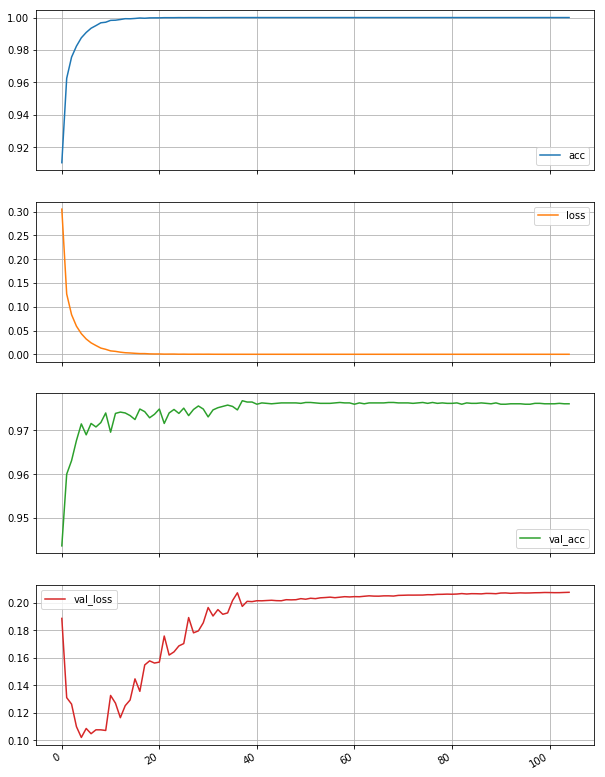

In [29]:
%matplotlib inline
import pandas as pd
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

#### DNN on mnist dataset

In [125]:
eval_results = model.predict(test_data[0])

right = 0
predNN = []
for i in range(10000):
    
    m = np.argmax(eval_results[i])
    predNN.append(m)
    if (m == test_data[1][i]):
            right = right + 1
accuracy = right/10000

print(accuracy)

0.9821


#### DNN on USPS dataset

In [104]:
USPSMat = np.asarray(USPSMat)

eval_results = model.predict(USPSMat)

right = 0
predNNU = []
for i in range(19999):
    
    m = np.argmax(eval_results[i])
    predNNU.append(m)
    if (m == USPSTar[i]):
            right = right + 1
accuracy = right/19999

print(accuracy)

[[2.0950228e-14 0.0000000e+00 6.1434344e-28 ... 1.0001681e-09
  4.1643047e-18 9.7595023e-07]
 [5.4831099e-04 8.9696761e-32 1.3242395e-05 ... 4.8334823e-17
  6.9710011e-25 3.2781527e-18]
 [9.9998605e-01 4.6866350e-27 1.0329853e-15 ... 1.3935022e-05
  8.1362345e-20 8.2789940e-22]
 ...
 [6.4100331e-12 1.3907077e-20 2.4975211e-08 ... 1.8122680e-02
  2.6887601e-09 1.2947954e-04]
 [2.9170544e-24 3.8441018e-11 3.0278934e-16 ... 4.4634257e-06
  1.3898868e-09 9.9999559e-01]
 [8.1267632e-20 5.8081291e-22 3.7722401e-19 ... 1.0000000e+00
  4.3471296e-17 7.3234273e-13]]
0.4232711635581779


In [106]:
from sklearn.metrics import confusion_matrix
>>> y_true = USPSTar
>>> y_predict = predNNU
>>> confusion_matrix(y_true, y_predict)

array([[ 533,    0,  236,   80,  106,  215,  268,  267,   34,  261],
       [  28,  334,  550,  110,  339,  132,   23,  286,  147,   51],
       [  35,    4, 1623,   38,   26,  106,   86,   34,   45,    2],
       [  26,   11,  419, 1014,   13,  411,   25,   26,   36,   19],
       [  15,   31,  132,   10, 1072,  129,   57,  335,  153,   66],
       [  18,    2,  418,   69,    8, 1344,   77,   28,   31,    5],
       [  51,   17,  546,   16,   34,  207,  963,  112,   13,   41],
       [  16,   69,  180,  438,   52,   50,   46,  929,  213,    7],
       [ 157,    4,  242,  309,  146,  317,  220,  182,  396,   27],
       [   6,   34,  163,  241,  162,   42,   24,  799,  272,  257]])

In [31]:
from sklearn.metrics import confusion_matrix
>>> y_true =test_data[1]  
>>> y_predict = predNN
>>> confusion_matrix(y_true, y_predict)

array([[ 971,    0,    1,    0,    0,    0,    4,    1,    3,    0],
       [   0, 1126,    2,    1,    0,    0,    2,    1,    3,    0],
       [   3,    1, 1014,    1,    3,    0,    2,    5,    3,    0],
       [   0,    0,    0,  996,    0,    2,    0,    4,    4,    4],
       [   1,    0,    1,    1,  964,    0,    5,    2,    2,    6],
       [   2,    0,    0,    7,    2,  871,    3,    2,    3,    2],
       [   4,    3,    1,    1,    5,    3,  939,    0,    2,    0],
       [   1,    4,    7,    2,    1,    0,    0, 1008,    3,    2],
       [   3,    0,    4,    3,    7,    2,    2,    4,  945,    4],
       [   2,    3,    0,    2,    6,    3,    1,    4,    1,  987]])

### Random Forest

In [73]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata

classifier3 = RandomForestClassifier(n_estimators=10)
classifier3.fit(training_data[0], training_data[1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
y_pred3 = classifier3.predict(test_data[0])
y_pred3.shape


(10000,)

#### Random forest on mnist dataset

In [126]:
right = 0

for i in range(10000):
    
    if (y_pred3[i] == test_data[1][i]):
            right = right + 1
        
accuracy = right/100

print(accuracy)

94.48


In [79]:
from sklearn.metrics import confusion_matrix
>>> y_true = test_data[1]  
>>> y_predict = y_pred3
>>> confusion_matrix(y_true, y_predict)

array([[ 970,    1,    0,    1,    1,    4,    2,    1,    0,    0],
       [   0, 1118,    3,    4,    0,    2,    2,    2,    4,    0],
       [   8,    4,  978,   10,    4,    0,    5,   13,    9,    1],
       [   1,    0,   17,  953,    0,   21,    1,    6,    9,    2],
       [   2,    2,    8,    2,  920,    1,    6,    2,    7,   32],
       [   8,    3,    5,   34,    6,  806,   12,    2,   11,    5],
       [  10,    3,    3,    2,   11,   12,  914,    0,    3,    0],
       [   1,    5,   24,   12,    5,    1,    0,  966,    4,   10],
       [   5,    2,   13,   19,    8,   12,    7,    6,  894,    8],
       [   9,    5,    5,   12,   23,    7,    1,   11,    7,  929]])

#### Random forest on USPS dataset

In [97]:
y_predU = classifier3.predict(USPSMat)
y_predU.shape
right = 0

for i in range(19999):
    
    if (y_predU[i] == USPSTar[i]):
            right = right + 1
        
accuracy = right/19999

print(accuracy)


0.30536526826341315


In [108]:
from sklearn.metrics import confusion_matrix
>>> y_true = USPSTar  
>>> y_predict = y_predU
>>> confusion_matrix(y_true, y_predict)

array([[ 602,   89,  363,   80,  312,  155,  103,  124,   16,  156],
       [  60,  526,  172,  184,  106,   89,   59,  755,   29,   20],
       [ 155,  122, 1033,  144,   64,  171,   64,  198,   18,   30],
       [  80,   78,  272, 1007,   49,  295,   15,  136,   19,   49],
       [  59,  219,  145,  132,  781,  189,   23,  336,   50,   66],
       [ 181,  102,  241,  246,   70,  923,   49,  121,   23,   44],
       [ 323,   99,  353,  100,  142,  355,  457,  104,   25,   42],
       [  61,  427,  392,  323,   39,  154,   19,  534,   41,   10],
       [ 123,  164,  281,  286,  157,  646,   84,   89,  128,   42],
       [  60,  312,  316,  370,  175,  154,   16,  397,   84,  116]])

### Combined Model for Logistic Regression, Linear SVM, Random Forest and Neural Network for MNIST

In [142]:
final =[]
for i in range(len(y_pred3)):
    k = predlog[i]
    l = predsvm1[i]
    m = predNN[i]
    n = y_pred3[i]
    listf = [k,l,m,n]
    classk = [predlog[i],l,predNN[i],y_pred3[i]].count(k)
    classl = [predlog[i],l,predNN[i],y_pred3[i]].count(l)
    classm = [predlog[i],l,predNN[i],y_pred3[i]].count(m)
    classn = [predlog[i],l,predNN[i],y_pred3[i]].count(n)
    
    maxim = [classk,classl,classm,classn]
    maxim2 = np.argmax(maxim)
    final.append(listf[maxim2])
    



In [143]:
right = 0

for i in range(9999):
    
    if (final[i] == test_data[1][i]):
            right = right + 1
        
accuracy = (right/9999)*100

print(accuracy)

93.84938493849386


In [144]:
from sklearn.metrics import confusion_matrix
>>> y_true = test_data[1] 
>>> y_predict = final
>>> confusion_matrix(y_true, y_predict)

array([[ 965,    0,    0,    1,    0,    2,    8,    1,    3,    0],
       [   0, 1117,    2,    3,    0,    0,    4,    1,    8,    0],
       [   8,    5,  941,   16,    6,    1,    9,   14,   29,    3],
       [   2,    0,   14,  950,    0,   17,    1,    9,   11,    6],
       [   1,    2,    3,    2,  920,    0,    8,    1,    8,   37],
       [   6,    1,    0,   31,    8,  806,   13,    4,   19,    4],
       [  10,    3,    2,    2,    8,   14,  917,    0,    2,    0],
       [   2,    9,   19,    5,    4,    0,    0,  964,    2,   23],
       [   5,    6,    6,   21,    7,   22,   10,   13,  872,   12],
       [   6,    6,    1,   11,   17,   13,    0,   19,    3,  933]])

### Combined Model for Logistic Regression, Linear SVM, Random Forest and Neural Network for USPS

In [150]:
final2 =[]
for i in range(19999):
    k = predlogU[i]
    l = predsvmU[i]
    m = predNNU[i]
    n = y_predU[i]
    listf = [k,l,m,n]
    classk = [k,l,m,n].count(k)
    classl = [k,l,m,n].count(l)
    classm = [k,l,m,n].count(m)
    classn = [k,l,m,n].count(n)
    
    maxim = [classk,classl,classm,classn]
    maxim2 = np.argmax(maxim)
    final2.append(listf[maxim2])
    

In [151]:
right = 0

for i in range(19999):
    
    if (final2[i] == USPSTar[i]):
            right = right + 1
        
accuracy = (right/19999)*100

print(accuracy)

37.6318815940797


In [152]:
from sklearn.metrics import confusion_matrix
>>> y_true = USPSTar
>>> y_predict = final2
>>> confusion_matrix(y_true, y_predict)

array([[ 555,    4,  341,   98,  158,  173,  116,  208,   79,  268],
       [  99,  379,  364,  238,  204,   94,   23,  462,  117,   20],
       [ 103,   18, 1427,  107,   30,  111,   73,   77,   37,   16],
       [  50,    3,  266, 1222,    3,  337,   15,   51,   31,   22],
       [  35,   74,   96,   55,  960,  152,   41,  300,  209,   78],
       [  82,   12,  353,  168,   16, 1208,   60,   62,   25,   14],
       [ 187,   14,  510,   77,   54,  327,  727,   55,   19,   30],
       [ 103,  188,  230,  508,   43,  103,   29,  582,  184,   30],
       [ 192,   26,  161,  346,   89,  617,  113,  109,  302,   45],
       [  23,  142,  156,  462,  106,   76,   14,  604,  253,  164]])